In [5]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, Flatten, MaxPooling1D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns


/home/ubuntu/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
df = pd.read_csv("./VBOX _supervised_scaled_reduced_and_labels.csv")

In [41]:
df.head()

,y,time,sats,long,lat,velocity,heading,height,vert-vel,GPS-Longacc,turn-radius,Centre-Line-Deviation,AbsHead,Longacc,Latacc,rel-height
0,0.0,0.000000,0.78,0.956592,0.218346,0.0,0.0,0.191770,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
1,0.0,0.001245,0.80,0.956592,0.218342,0.0,0.0,0.189038,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
2,0.0,0.001324,0.80,0.956591,0.218343,0.0,0.0,0.189927,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
3,0.0,0.001404,0.80,0.956591,0.218344,0.0,0.0,0.190914,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973
4,0.0,0.001483,0.80,0.956590,0.218345,0.0,0.0,0.191408,0.488462,0.333935,0.0,0.776476,0.992333,0.930492,0.906582,0.017973


In [42]:
train, test = train_test_split(df, test_size=.2) 

In [43]:
X_train = train.drop('y',axis=1)
X_train = X_train.to_numpy()
y_train = np.asarray(train['y'])

X_test = test.drop('y',axis=1)
X_test = X_test.to_numpy()
y_test = np.asarray(test['y'])

In [44]:
# Reshaping
shape = X_train.shape

X_train = X_train.reshape(shape[0],shape[1],1)



shape = X_test.shape

X_test = X_test.reshape(shape[0],shape[1],1)


print(X_train.shape,y_train.shape)


(5776, 15, 1) (5776,)


In [45]:
X_train.shape

(5776, 15, 1)

In [53]:
# fit and evaluate a model
(trainX, trainy, testX, testy) = (X_train,y_train,X_test,y_test)
verbose, epochs, batch_size = 0, 50, 8
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[0]
model = Sequential()
model.add(Conv1D(filters=15, kernel_size=2,  activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=30, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(30, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])
# fit network


history = model.fit(trainX, trainy, epochs=250, batch_size=32, verbose=2, validation_split=0.2)

Train on 4620 samples, validate on 1156 samples
Epoch 1/250
 - 1s - loss: 0.1940 - mean_squared_error: 0.1940 - val_loss: 0.1802 - val_mean_squared_error: 0.1802
Epoch 2/250
 - 1s - loss: 0.1663 - mean_squared_error: 0.1663 - val_loss: 0.1828 - val_mean_squared_error: 0.1828
Epoch 3/250
 - 1s - loss: 0.1594 - mean_squared_error: 0.1594 - val_loss: 0.1589 - val_mean_squared_error: 0.1589
Epoch 4/250
 - 1s - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 0.1403 - val_mean_squared_error: 0.1403
Epoch 5/250
 - 1s - loss: 0.1439 - mean_squared_error: 0.1439 - val_loss: 0.1317 - val_mean_squared_error: 0.1317
Epoch 6/250
 - 1s - loss: 0.1393 - mean_squared_error: 0.1393 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 7/250
 - 1s - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 8/250
 - 1s - loss: 0.1327 - mean_squared_error: 0.1327 - val_loss: 0.1259 - val_mean_squared_error: 0.1259
Epoch 9/250
 - 1s - loss: 0.1303 - mean_

Epoch 72/250
 - 1s - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0624 - val_mean_squared_error: 0.0624
Epoch 73/250
 - 1s - loss: 0.0717 - mean_squared_error: 0.0717 - val_loss: 0.0623 - val_mean_squared_error: 0.0623
Epoch 74/250
 - 1s - loss: 0.0701 - mean_squared_error: 0.0701 - val_loss: 0.0586 - val_mean_squared_error: 0.0586
Epoch 75/250
 - 1s - loss: 0.0710 - mean_squared_error: 0.0710 - val_loss: 0.0574 - val_mean_squared_error: 0.0574
Epoch 76/250
 - 1s - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0629 - val_mean_squared_error: 0.0629
Epoch 77/250
 - 1s - loss: 0.0704 - mean_squared_error: 0.0704 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 78/250
 - 1s - loss: 0.0690 - mean_squared_error: 0.0690 - val_loss: 0.0581 - val_mean_squared_error: 0.0581
Epoch 79/250
 - 1s - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 80/250
 - 1s - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.056

Epoch 143/250
 - 1s - loss: 0.0616 - mean_squared_error: 0.0616 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 144/250
 - 1s - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 145/250
 - 1s - loss: 0.0590 - mean_squared_error: 0.0590 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 146/250
 - 1s - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 147/250
 - 1s - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.0513 - val_mean_squared_error: 0.0513
Epoch 148/250
 - 1s - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 149/250
 - 1s - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 150/250
 - 1s - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 151/250
 - 1s - loss: 0.0595 - mean_squared_error: 0.0595 - val_lo

Epoch 214/250
 - 1s - loss: 0.0576 - mean_squared_error: 0.0576 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 215/250
 - 1s - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 216/250
 - 1s - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 217/250
 - 1s - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 218/250
 - 1s - loss: 0.0565 - mean_squared_error: 0.0565 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 219/250
 - 1s - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.0451 - val_mean_squared_error: 0.0451
Epoch 220/250
 - 1s - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 221/250
 - 1s - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 222/250
 - 1s - loss: 0.0558 - mean_squared_error: 0.0558 - val_lo

In [54]:
# evaluate model
_, mse = model.evaluate(testX, testy, batch_size=batch_size, verbose=2)

In [55]:
mse

0.05294260086328964

In [58]:
y_pred = []
pred_data = model.predict(testX)
for i in pred_data:
    if i < 0.8:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [57]:
testy

array([0., 1., 0., ..., 1., 1., 0.])

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testy, y_pred)
print(confusion_matrix)

[[984  20]
 [ 77 364]]


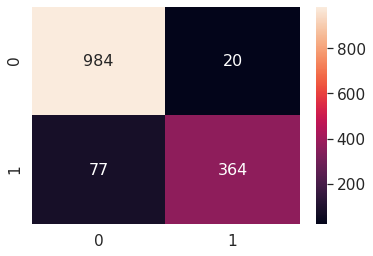

In [63]:
df_cm = pd.DataFrame(confusion_matrix)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='g') # font size

plt.show()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(testy, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1004
         1.0       0.95      0.83      0.88       441

    accuracy                           0.93      1445
   macro avg       0.94      0.90      0.92      1445
weighted avg       0.93      0.93      0.93      1445



In [62]:
from sklearn.metrics import mean_squared_error
mean_squared_error(testy, y_pred)

0.0671280276816609